#DBSCAN Clustering

Density-Based Spatial Clustering of Applications with Noise (DBSCAN) is a clustering algorithm used in machine learning to partition data into clusters based on their distance to other points. Its effective at identifying and removing noise in a data set, making it useful for data cleaning and outlier detection

#About the Dataset

The dataset (Penguins Species dataset) was taken from kaggle. The dataset consists of 5 columns

1. culmen_length_mm: culmen length (mm)
2. culmen_depth_mm: culmen depth (mm)
3. flipper_length_mm: flipper length (mm)
4. body_mass_g: body mass (g)
5. sex: penguin sex

**Problem statement:**

To identify clusters of similar data points with the help of DBSCAN algorithm.

#Import the necessary libraries

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

#Load the dataset

In [51]:
data=pd.read_csv("penguins.csv")

#Summarizing the dataset

In [52]:
data.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,NaN,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0,FEMALE


In [53]:
data.shape

(344, 5)

In [54]:
data.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,214.014620,4201.754386
std,5.459584,1.974793,260.558057,801.954536
min,32.100000,13.100000,-132.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.750000,4750.000000
max,59.600000,21.500000,5000.000000,6300.000000


In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   342 non-null    float64
 1   culmen_depth_mm    342 non-null    float64
 2   flipper_length_mm  342 non-null    float64
 3   body_mass_g        342 non-null    float64
 4   sex                335 non-null    object 
dtypes: float64(4), object(1)
memory usage: 13.6+ KB


#EDA

In [56]:
#check the null values
data.isnull().sum()

culmen_length_mm     2
culmen_depth_mm      2
flipper_length_mm    2
body_mass_g          2
sex                  9
dtype: int64

In [57]:
#Drop the null values
df=data.dropna(axis=0)

#re-check the null values
df.isnull().sum()

culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [58]:
df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,335.000000,335.000000,335.000000,335.000000
mean,43.988358,17.169552,214.355224,4209.179104
std,5.453430,1.971966,263.253508,803.633495
min,32.100000,13.100000,-132.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.500000,17.300000,197.000000,4050.000000
75%,48.550000,18.700000,213.000000,4787.500000
max,59.600000,21.500000,5000.000000,6300.000000


Tthe above output showing is a negative value in column "flipper_length_mm".

Check if this column contains more negative datapoints.



In [59]:
#check the negative values
negative=(df['flipper_length_mm']<0).sum()
print(negative)

1


In [60]:
#Creat a copy of dataset
df_copy=df.copy()

In [61]:
#Replace negative datapoint to positive value in copy of dataset
df_copy['flipper_length_mm']=df_copy["flipper_length_mm"].abs()

df_copy.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,335.000000,335.000000,335.000000,335.000000
mean,43.988358,17.169552,215.143284,4209.179104
std,5.453430,1.971966,262.607931,803.633495
min,32.100000,13.100000,132.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.500000,17.300000,197.000000,4050.000000
75%,48.550000,18.700000,213.000000,4787.500000
max,59.600000,21.500000,5000.000000,6300.000000


In [62]:
df_copy.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
4,36.7,19.3,193.0,3450.0,FEMALE
5,39.3,20.6,190.0,3650.0,MALE


Drop column "sex" as it contains only 2 variable.

In [63]:
#Drop column "sex"
df_copy_cleaned=df_copy.drop("sex",axis=1)
df_copy_cleaned.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
4,36.7,19.3,193.0,3450.0
5,39.3,20.6,190.0,3650.0


In [64]:
df_copy_cleaned

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
4,36.7,19.3,193.0,3450.0
5,39.3,20.6,190.0,3650.0
...,...,...,...,...
338,47.2,13.7,214.0,4925.0
340,46.8,14.3,215.0,4850.0
341,50.4,15.7,222.0,5750.0
342,45.2,14.8,212.0,5200.0


# Converting the Dataset in DataFrame Format to Array

In [65]:
df_copy_cleaned_array=df_copy_cleaned.values
df_copy_cleaned_array

array([[  39.1,   18.7,  181. , 3750. ],
       [  39.5,   17.4,  186. , 3800. ],
       [  40.3,   18. ,  195. , 3250. ],
       ...,
       [  50.4,   15.7,  222. , 5750. ],
       [  45.2,   14.8,  212. , 5200. ],
       [  49.9,   16.1,  213. , 5400. ]])

##Standerdize the data

In [66]:
scale=StandardScaler()
x=scale.fit_transform(df_copy_cleaned_array) #Standardize the data
x

array([[-0.89772327,  0.77726336, -0.13021068, -0.57223347],
       [-0.82426521,  0.11703673, -0.11114241, -0.50992298],
       [-0.67734909,  0.42175671, -0.07681952, -1.19533834],
       ...,
       [ 1.17746691, -0.74633656,  0.02614915,  1.920186  ],
       [ 0.22251214, -1.20341653, -0.0119874 ,  1.23477065],
       [ 1.08564434, -0.5431899 , -0.00817374,  1.4840126 ]])

#Loading the model

In [67]:
model=DBSCAN(min_samples=5)
model

DBSCAN()

#Training the model

In [68]:
model.fit(x)

DBSCAN()

#Displaying the model

In [69]:
model.labels_

array([ 0,  0,  0,  0,  0,  0,  0, -1,  0,  0, -1,  0,  0, -1,  0, -1,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
       -1,  0,  0,  0,  0,  0,  0,  0, -1,  0, -1,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0, -1,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0, -1,  0,  0,  0,  0,  0,  0,  0, -1, -1,  0, -1,  0,  0, -1,
        0,  0,  0,  0,  0,  0, -1,  0, -1,  0,  0,  0,  0,  0, -1, -1, -1,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1

In [70]:
set(list(model.labels_))

{-1, 0, 1}

In [71]:
class_=pd.DataFrame(model.labels_,columns=['cluster_values'])
class_

,cluster_values
0,0
1,0
2,0
3,0
4,0
...,...
330,1
331,1
332,1
333,1


In [72]:
df_copy_cleaned

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
4,36.7,19.3,193.0,3450.0
5,39.3,20.6,190.0,3650.0
...,...,...,...,...
338,47.2,13.7,214.0,4925.0
340,46.8,14.3,215.0,4850.0
341,50.4,15.7,222.0,5750.0
342,45.2,14.8,212.0,5200.0


#Merging the cluster_values to dataset

In [73]:
final_df=pd.concat([df_copy_cleaned,class_],axis=1)
final_df

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,cluster_values
0,39.1,18.7,181.0,3750.0,0.0
1,39.5,17.4,186.0,3800.0,0.0
2,40.3,18.0,195.0,3250.0,0.0
4,36.7,19.3,193.0,3450.0,0.0
5,39.3,20.6,190.0,3650.0,0.0
...,...,...,...,...,...
11,NaN,NaN,NaN,NaN,0.0
47,NaN,NaN,NaN,NaN,0.0
246,NaN,NaN,NaN,NaN,1.0
286,NaN,NaN,NaN,NaN,1.0


In [74]:
#Check the null values in merged dataset
final_df.isnull().sum()

culmen_length_mm     8
culmen_depth_mm      8
flipper_length_mm    8
body_mass_g          8
cluster_values       8
dtype: int64

In [75]:
#Drop the null values in the merged dataset
final_df2=final_df.dropna(axis=0)

#re-check the null values
final_df2.isnull().sum()

culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
cluster_values       0
dtype: int64

In [76]:
final_df2

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,cluster_values
0,39.1,18.7,181.0,3750.0,0.0
1,39.5,17.4,186.0,3800.0,0.0
2,40.3,18.0,195.0,3250.0,0.0
4,36.7,19.3,193.0,3450.0,0.0
5,39.3,20.6,190.0,3650.0,0.0
...,...,...,...,...,...
330,50.5,15.2,216.0,5000.0,1.0
331,49.8,15.9,229.0,5950.0,1.0
332,43.5,15.2,213.0,4650.0,1.0
333,51.5,16.3,230.0,5500.0,1.0


In [77]:
#The values in column "cluster_values" are in float.
final_df2["cluster_values"]=final_df2["cluster_values"].astype(int) #Convert the float value to integer
final_df2

<ipython-input-77-aaf75b950320>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df2["cluster_values"]=final_df2["cluster_values"].astype(int) #Convert the float value to integer


,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,cluster_values
0,39.1,18.7,181.0,3750.0,0
1,39.5,17.4,186.0,3800.0,0
2,40.3,18.0,195.0,3250.0,0
4,36.7,19.3,193.0,3450.0,0
5,39.3,20.6,190.0,3650.0,0
...,...,...,...,...,...
330,50.5,15.2,216.0,5000.0,1
331,49.8,15.9,229.0,5950.0,1
332,43.5,15.2,213.0,4650.0,1
333,51.5,16.3,230.0,5500.0,1


#Generating Inference

In [78]:
final_df2['cluster_values'].unique() #Check the unique value in column "cluster_values"

array([ 0, -1,  1])

We can interpret from the above output that there are 2 clusters (1 and 2). The data points corresponding to -1 are outliers.

In [79]:
#Extract the outliers (ie, datapoints corresponding to cluster value "-1")
final_df2[final_df2['cluster_values']==-1]

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,cluster_values
7,39.2,19.6,195.0,4675.0,-1
13,38.6,21.2,191.0,3800.0,-1
15,36.6,17.8,185.0,3700.0,-1
44,37.0,16.9,185.0,3000.0,-1
56,39.0,17.5,186.0,3550.0,-1
68,35.9,16.6,190.0,3050.0,-1
76,40.9,16.8,191.0,3700.0,-1
78,36.2,16.1,187.0,3550.0,-1
104,37.9,18.6,193.0,2925.0,-1
106,38.6,17.2,199.0,3750.0,-1


In [80]:
#Extract all values with cluster value = 1
final_df2[final_df2['cluster_values']==1]

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,cluster_values
215,55.8,19.8,207.0,4000.0,1
216,43.5,18.1,202.0,3400.0,1
217,49.6,18.2,193.0,3775.0,1
218,50.8,19.0,210.0,4100.0,1
219,50.2,18.7,198.0,3775.0,1
...,...,...,...,...,...
330,50.5,15.2,216.0,5000.0,1
331,49.8,15.9,229.0,5950.0,1
332,43.5,15.2,213.0,4650.0,1
333,51.5,16.3,230.0,5500.0,1


In [81]:
#Extract all data with cluster value = 0
final_df2[final_df2['cluster_values']==0]

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,cluster_values
0,39.1,18.7,181.0,3750.0,0
1,39.5,17.4,186.0,3800.0,0
2,40.3,18.0,195.0,3250.0,0
4,36.7,19.3,193.0,3450.0,0
5,39.3,20.6,190.0,3650.0,0
...,...,...,...,...,...
209,49.3,19.9,203.0,4050.0,0
211,45.6,19.4,194.0,3525.0,0
212,51.9,19.5,206.0,3950.0,0
213,46.8,16.5,189.0,3650.0,0


#Visualize the results

Visualize the results using ScatterPlot.

In [82]:
#Assign the data to x-axis (assign thedata of first 4 column to x)
input_X=final_df2.iloc[:,:-1].values
input_X

array([[  39.1,   18.7,  181. , 3750. ],
       [  39.5,   17.4,  186. , 3800. ],
       [  40.3,   18. ,  195. , 3250. ],
       ...,
       [  43.5,   15.2,  213. , 4650. ],
       [  51.5,   16.3,  230. , 5500. ],
       [  46.2,   14.1,  217. , 4375. ]])

In [83]:
#Assign the data to y-axis (assign data of last column "cluster_values") to y-axis
output_y=final_df2.iloc[:,-1].values
output_y

array([ 0,  0,  0,  0,  0,  0, -1,  0,  0, -1,  0, -1,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
       -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,
        0,  0,  0, -1,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0, -1,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,
        0,  0,  0,  0,  0, -1, -1,  0, -1,  0,  0, -1,  0,  0,  0,  0,  0,
        0, -1,  0, -1,  0,  0,  0,  0,  0, -1, -1, -1,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0, -1,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1

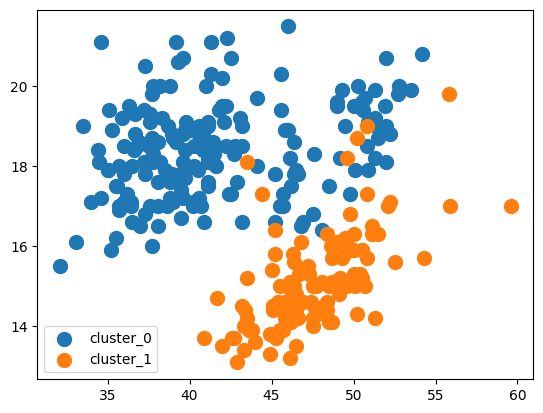

In [84]:
#Plot the scatterplot
plt.scatter(input_X[output_y==0,0],input_X[output_y==0,1],s=100,label="cluster_0")
plt.scatter(input_X[output_y==1,0],input_X[output_y==1,1],s=100,label="cluster_1")
plt.legend()
plt.show()